In [3]:
from skimage import io,filters, morphology, measure, draw,exposure
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import trackpy as tp
import pandas as pd
from scipy.stats import median_abs_deviation
from scipy.optimize import curve_fit
from sklearn.neighbors import KernelDensity
from scipy.stats import ttest_ind,ttest_rel
from skimage.filters import threshold_otsu
import seaborn as sns
import sys
sys.path.insert(1, '</PATH/TO/DIR/>WAVE/')
import identify_rings as idr
import warnings
warnings.filterwarnings('ignore')

In [4]:
PATH = '</PATH/TO/DIR/>WAVE/Agarose_pad_compression/'

In [5]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [6]:
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B



In [7]:
image = io.imread(PATH + 'example_images/231031_latb_4_1_no_gel_SIR.tif')

In [8]:
image = image.T

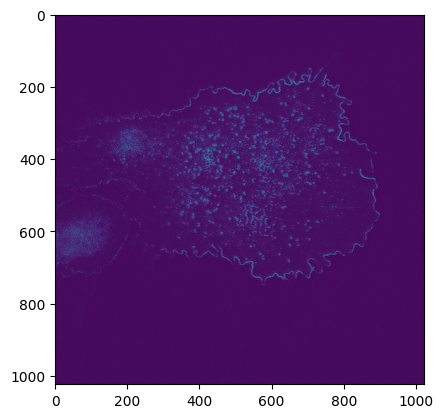

In [9]:
plt.imshow(image[0])

In [10]:
threshold_otsu(image[2])

162.01064

10.0 4.300000000000001 0.7428571428571429


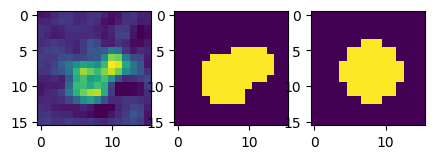

17.0 4.0 0.75


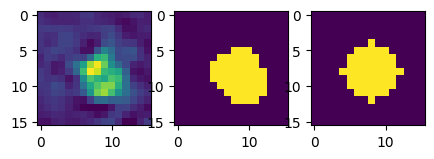

19.0 4.300000000000001 0.8412698412698413


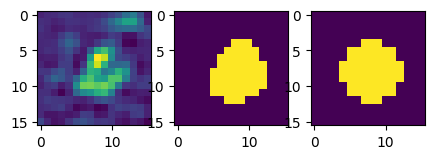

30.0 4.0 0.7213114754098361


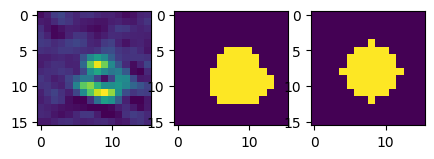

44.0 4.5 0.7916666666666666


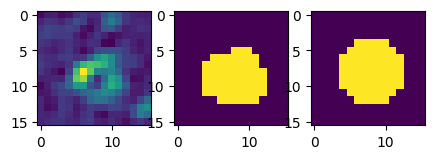

55.0 3.7 0.7407407407407407


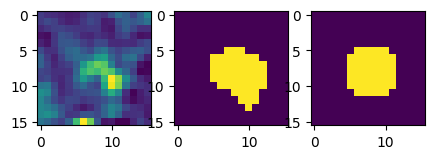

68.0 4.0 0.803921568627451


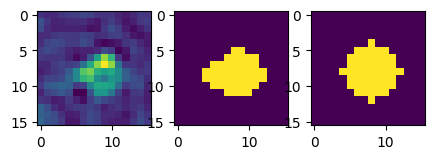

70.0 4.5 0.7625


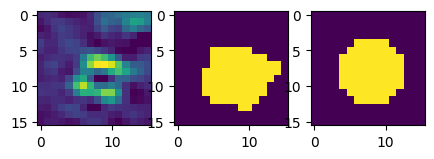

81.0 3.7 0.8


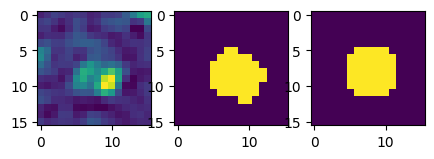

87.0 3.2 0.7631578947368421


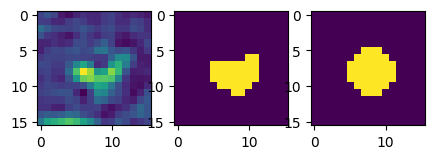

90.0 3.2 0.7209302325581395


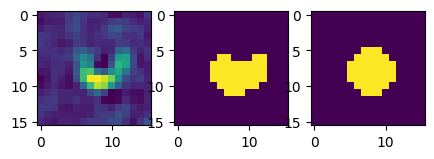

92.0 3.2 0.7894736842105263


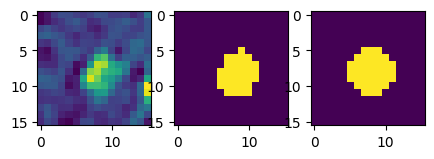

93.0 4.5 0.7808219178082192


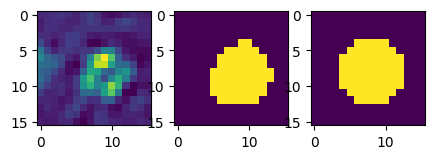

104.0 3.2 0.7906976744186046


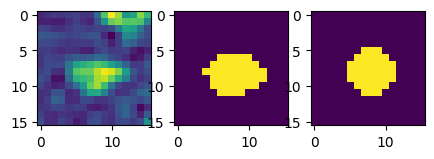

125.0 4.300000000000001 0.7714285714285715


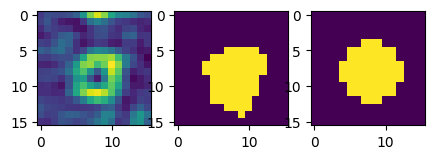

137.0 4.2 0.75


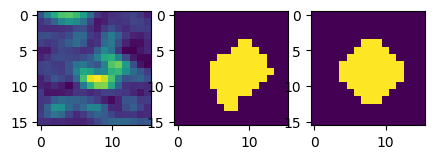

138.0 3.7 0.7916666666666666


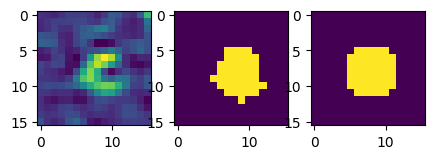

152.0 5.4 0.7207207207207207


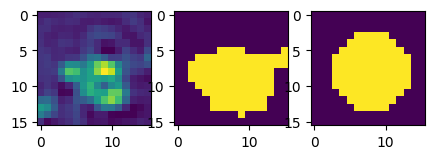

159.0 4.0 0.7966101694915254


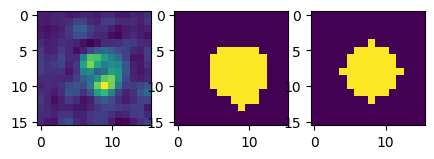

179.0 3.7 0.7647058823529411


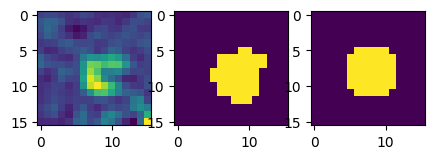

185.0 3.7 0.7272727272727273


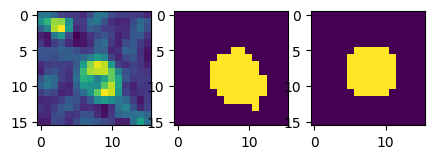

186.0 4.0 0.8363636363636363


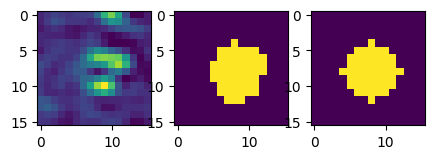

194.0 4.0 0.7666666666666667


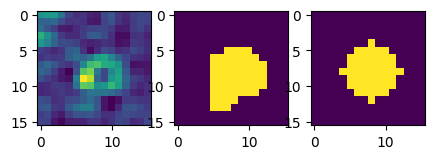

202.0 3.0 0.7272727272727273


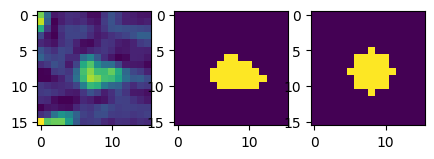

203.0 2.9000000000000004 0.71875


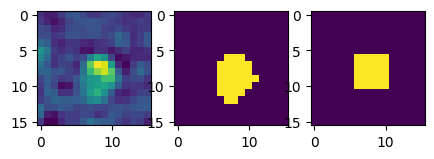

251.0 4.2 0.7464788732394366


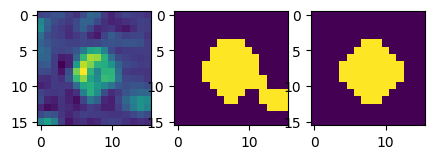

257.0 4.5 0.9027777777777778


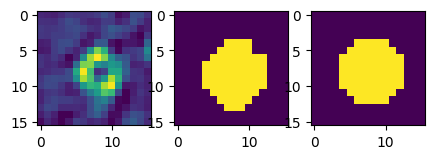

302.0 4.2 0.7966101694915254


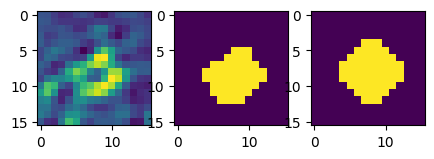

329.0 4.300000000000001 0.7123287671232876


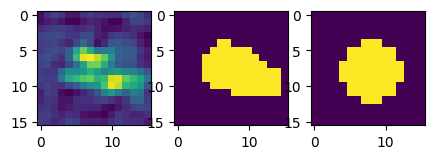

334.0 4.300000000000001 0.7611940298507462


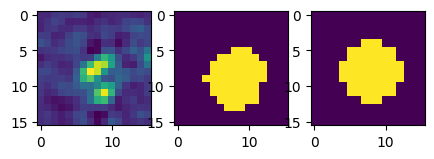

370.0 5.0 0.8068181818181818


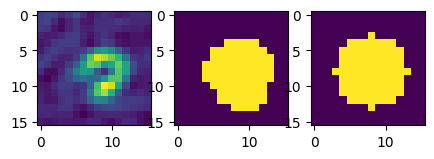

447.0 4.300000000000001 0.8307692307692308


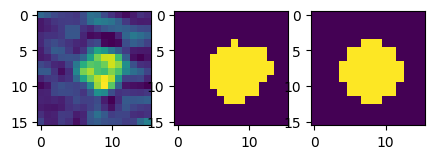

452.0 3.7 0.78


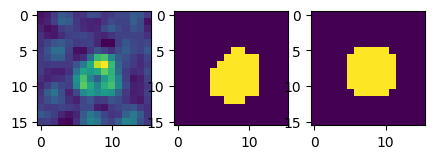

454.0 5.4 0.7477477477477478


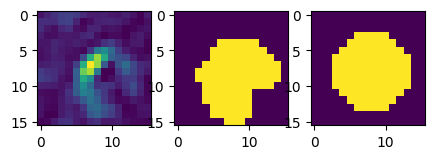

458.0 3.2 0.875


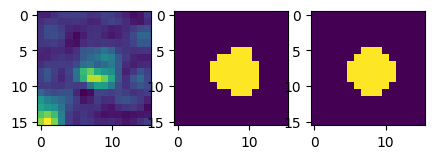

461.0 4.2 0.78125


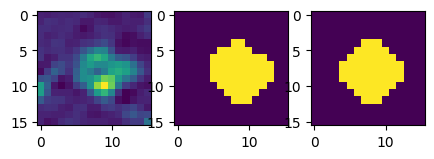

471.0 3.7 0.72


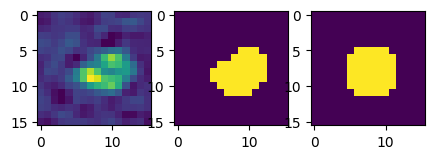

482.0 4.0 0.8867924528301887


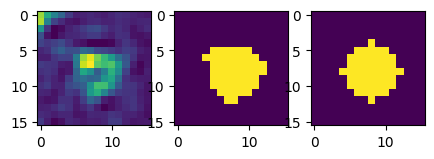

504.0 3.7 0.7333333333333333


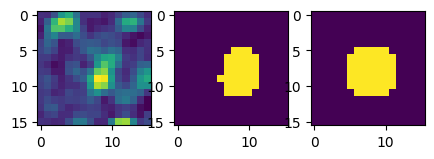

521.0 3.7 0.7708333333333334


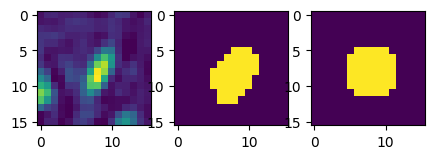

529.0 4.0 0.7272727272727273


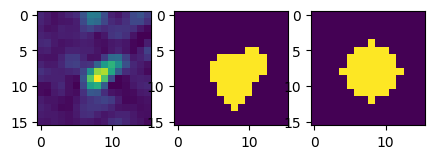

545.0 4.0 0.7368421052631579


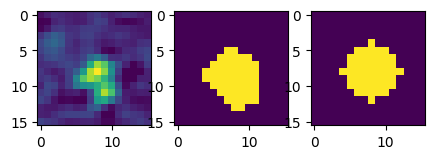

546.0 3.0 0.8125


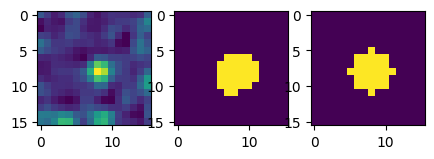

548.0 3.0 0.7575757575757576


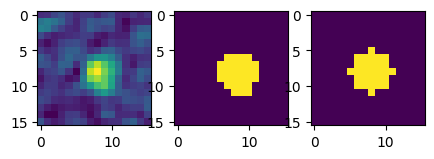

562.0 5.0 0.7126436781609196


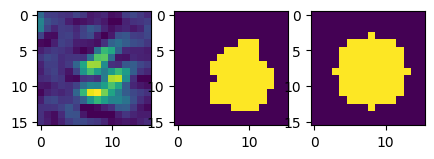

583.0 3.7 0.7222222222222222


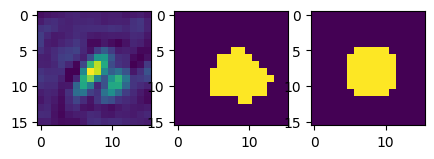

592.0 3.7 0.75


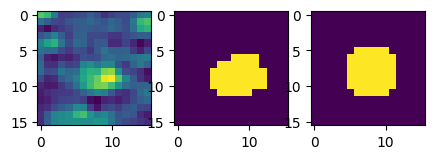

622.0 4.0 0.7818181818181819


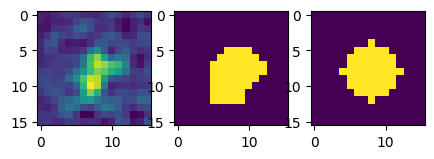

694.0 4.5 0.9166666666666666


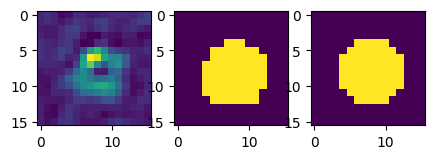

709.0 3.2 0.7727272727272727


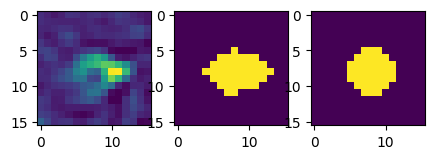

713.0 4.0 0.7580645161290323


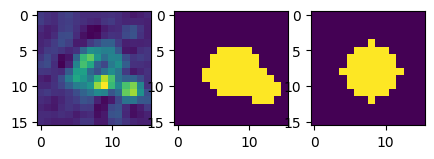

729.0 3.7 0.7346938775510204


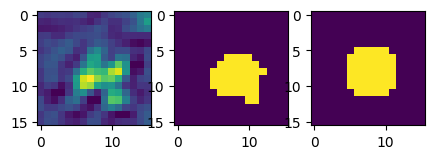

737.0 4.2 0.7301587301587301


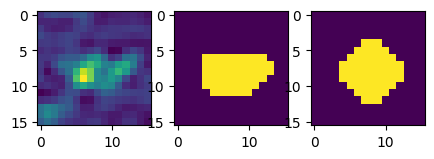

740.0 3.2 0.8780487804878049


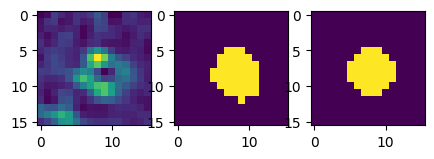

753.0 3.0 0.7105263157894737


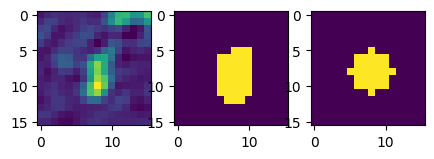

766.0 4.2 0.7142857142857143


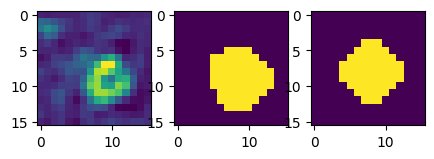

778.0 4.0 0.8518518518518519


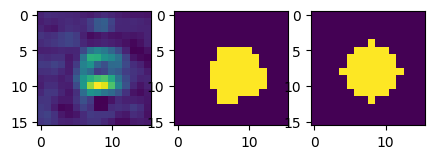

784.0 3.2 0.75


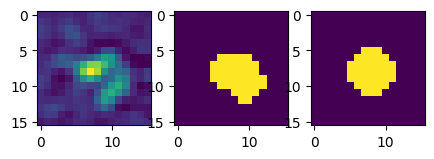

786.0 3.7 0.7692307692307693


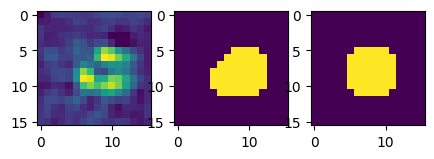

798.0 4.0 0.7142857142857143


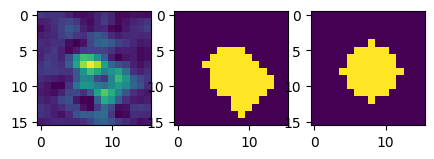

799.0 3.7 0.7291666666666666


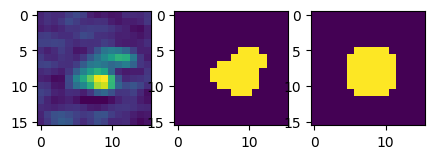

804.0 4.2 0.8620689655172413


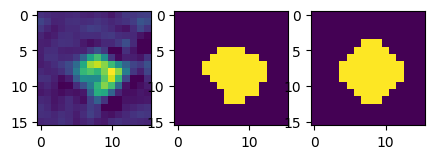

806.0 4.0 0.7857142857142857


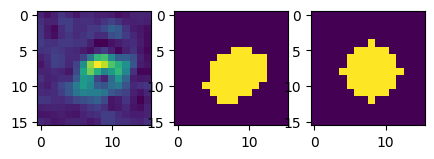

828.0 4.300000000000001 0.8115942028985508


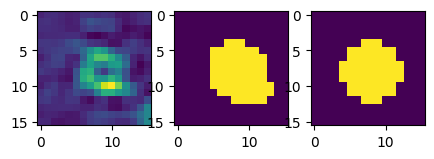

830.0 4.2 0.8448275862068966


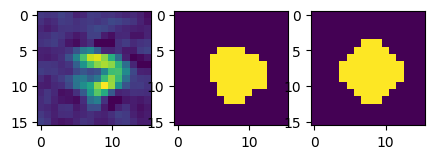

842.0 3.7 0.7708333333333334


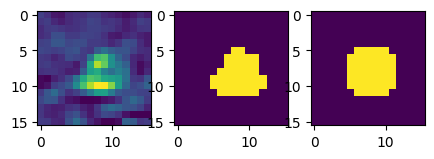

845.0 4.300000000000001 0.7123287671232876


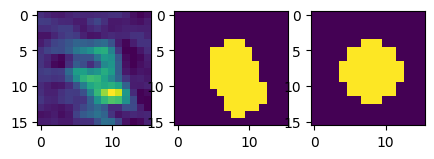

18.0 4.2 0.7352941176470589


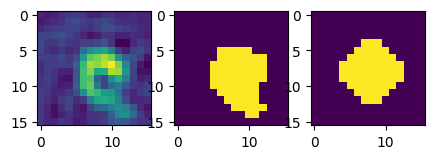

21.0 4.5 0.7945205479452054


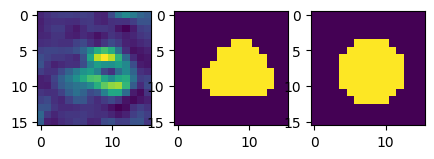

26.0 4.5 0.875


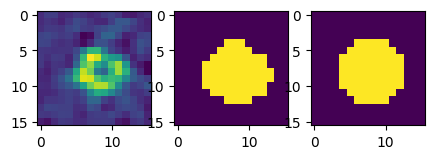

36.0 4.5 0.759493670886076


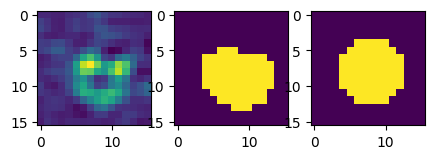

49.0 4.300000000000001 0.7205882352941176


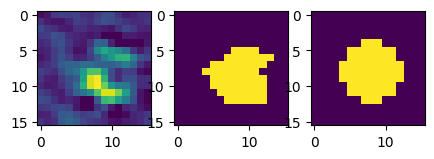

58.0 4.2 0.8333333333333334


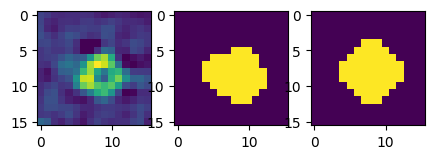

74.0 3.7 0.7735849056603774


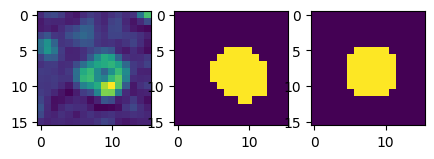

85.0 4.300000000000001 0.8181818181818182


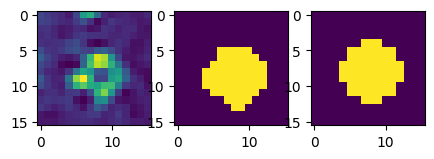

102.0 3.7 0.7916666666666666


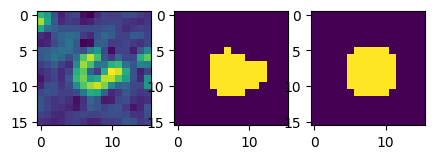

103.0 5.4 0.7358490566037735


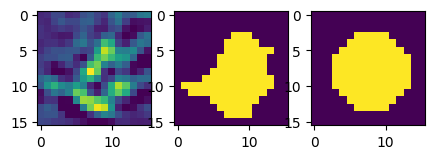

128.0 4.5 0.725


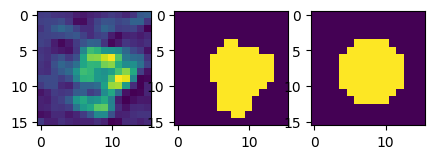

140.0 4.300000000000001 0.7236842105263158


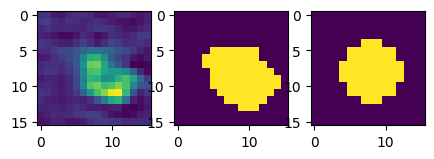

154.0 4.0 0.8363636363636363


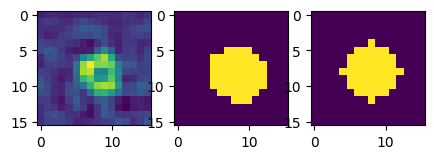

166.0 4.300000000000001 0.7763157894736842


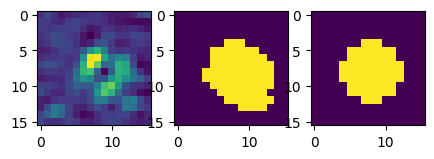

197.0 3.2 0.7297297297297297


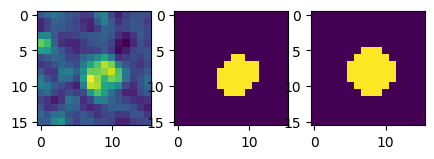

209.0 4.5 0.735632183908046


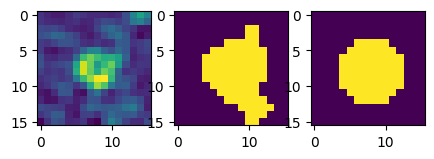

218.0 4.300000000000001 0.7432432432432432


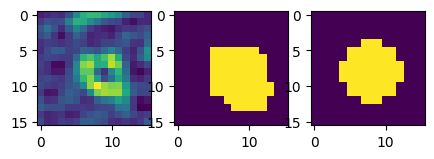

244.0 4.5 0.7195121951219512


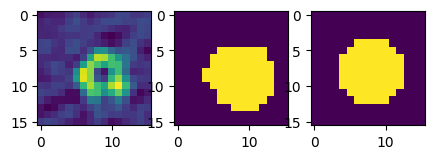

277.0 3.2 0.7659574468085106


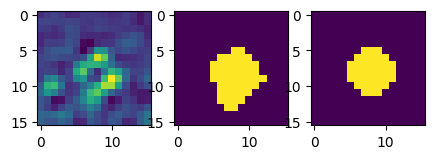

293.0 5.1000000000000005 0.797979797979798


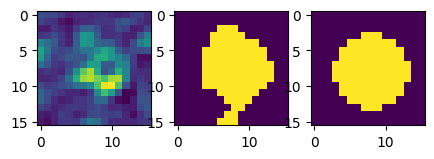

307.0 3.7 0.7647058823529411


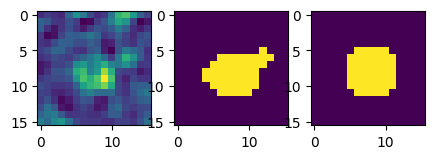

337.0 4.5 0.8933333333333333


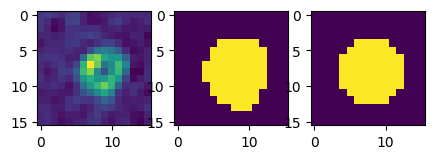

349.0 3.2 0.717948717948718


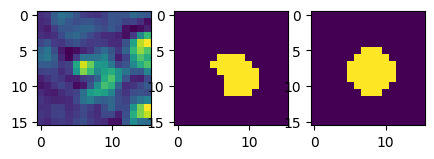

376.0 3.7 0.8


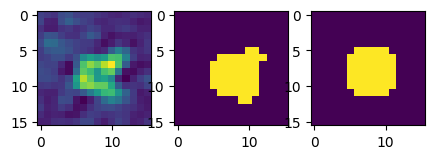

382.0 3.0 0.7222222222222222


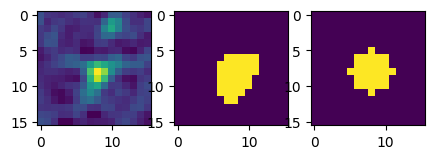

383.0 4.300000000000001 0.726027397260274


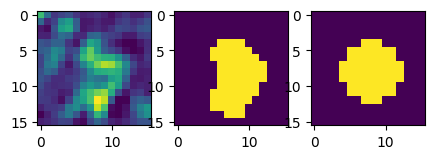

408.0 5.4 0.7592592592592593


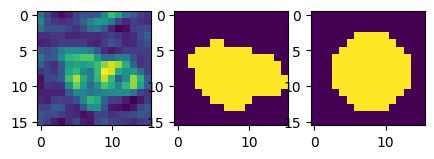

421.0 4.300000000000001 0.7428571428571429


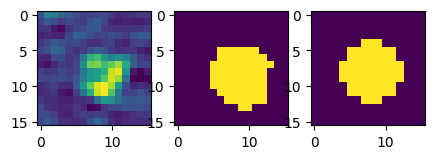

430.0 3.7 0.8333333333333334


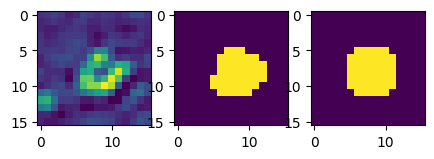

448.0 3.7 0.72


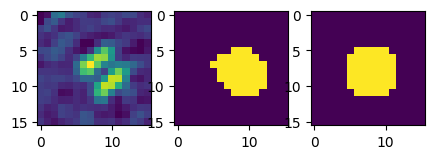

450.0 4.2 0.7352941176470589


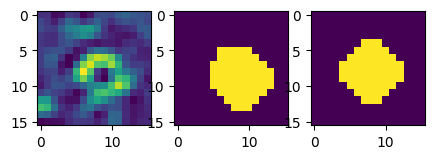

513.0 3.0 0.78125


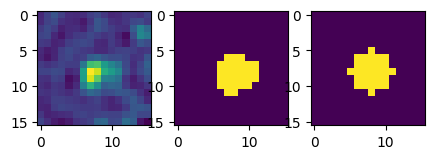

515.0 4.0 0.7321428571428571


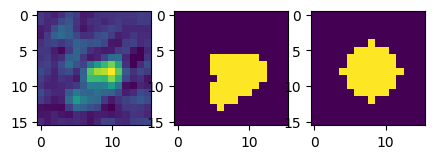

543.0 5.7 0.7181818181818181


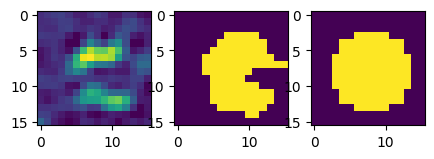

544.0 3.2 0.8372093023255814


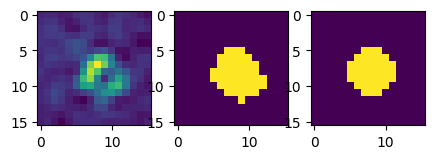

550.0 3.2 0.725


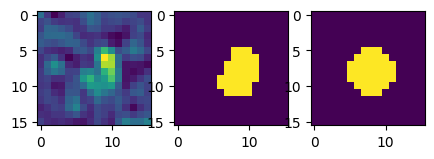

558.0 4.0 0.7169811320754716


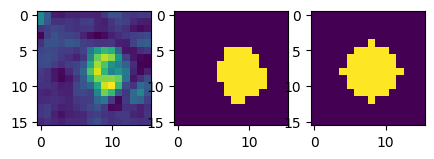

577.0 4.2 0.8064516129032258


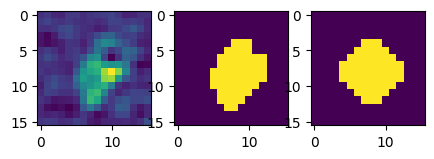

578.0 3.2 0.8421052631578947


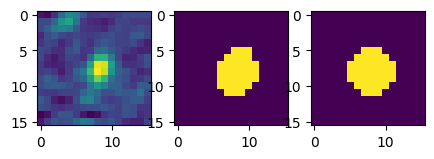

637.0 4.5 0.7564102564102564


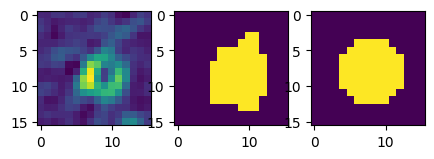

653.0 3.2 0.8048780487804879


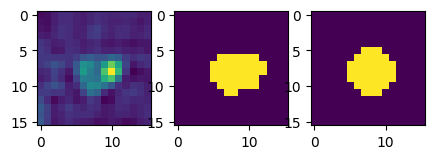

654.0 4.300000000000001 0.7205882352941176


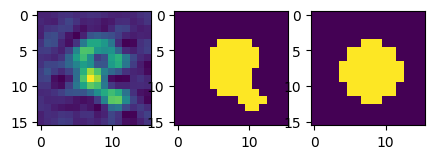

662.0 3.2 0.7441860465116279


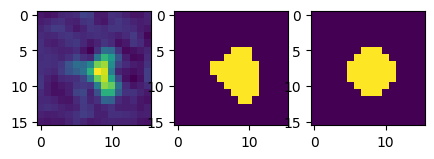

665.0 5.0 0.7227722772277227


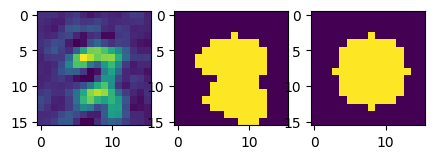

672.0 3.2 0.8095238095238095


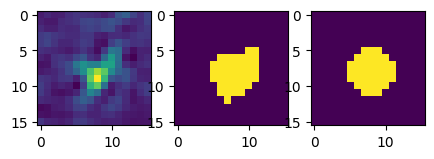

673.0 3.2 0.7857142857142857


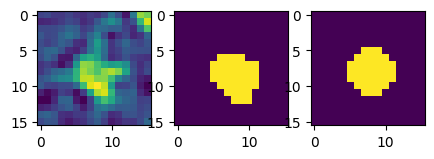

680.0 3.7 0.8333333333333334


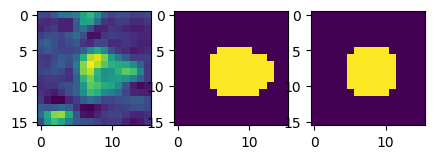

712.0 4.5 0.7866666666666666


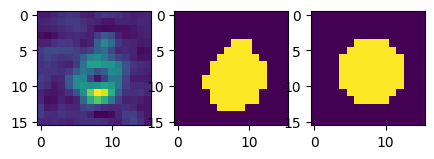

717.0 3.2 0.8461538461538461


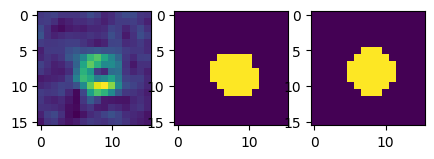

723.0 4.5 0.726027397260274


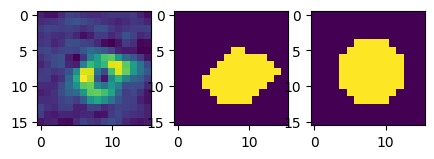

730.0 3.7 0.8


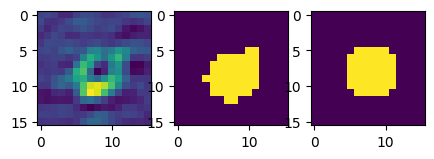

735.0 4.5 0.7916666666666666


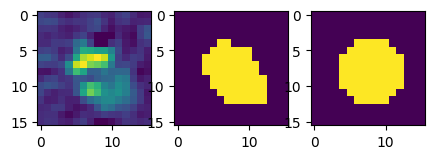

736.0 3.7 0.7608695652173914


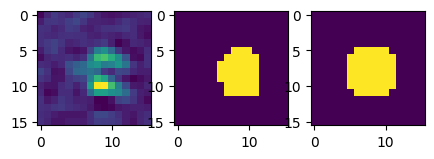

741.0 3.7 0.7291666666666666


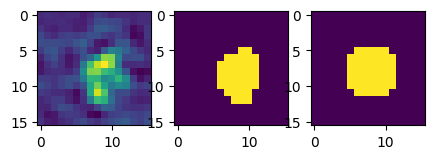

767.0 4.0 0.8333333333333334


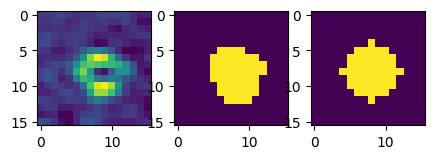

777.0 3.7 0.8666666666666667


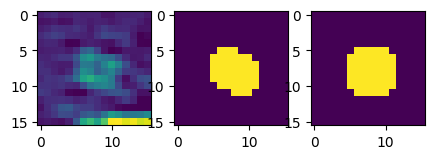

12.0 3.7 0.72


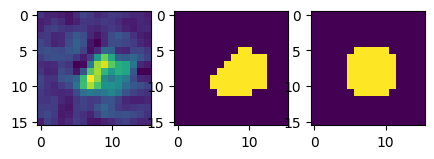

19.0 4.300000000000001 0.7391304347826086


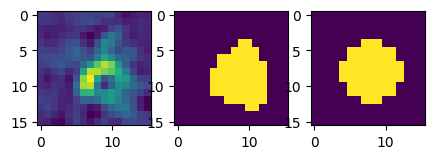

21.0 4.2 0.746031746031746


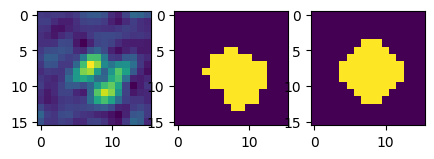

25.0 4.5 0.9


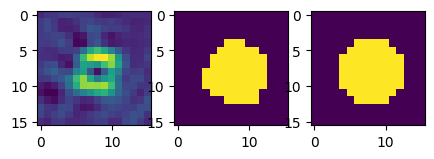

38.0 3.2 0.7948717948717948


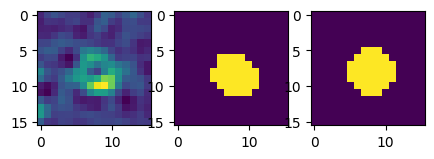

45.0 3.2 0.7142857142857143


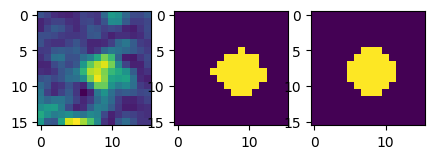

53.0 4.300000000000001 0.726027397260274


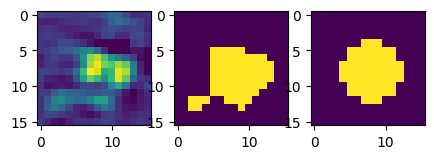

56.0 5.1000000000000005 0.7777777777777778


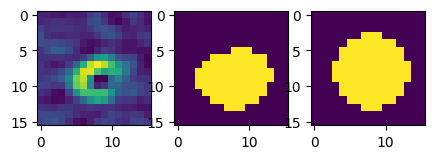

80.0 2.9000000000000004 0.8064516129032258


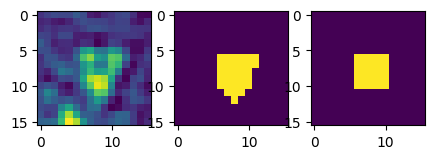

84.0 4.5 0.7222222222222222


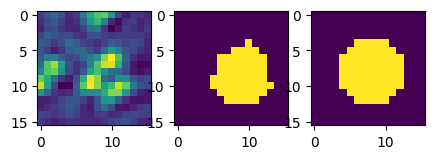

95.0 3.0 0.84375


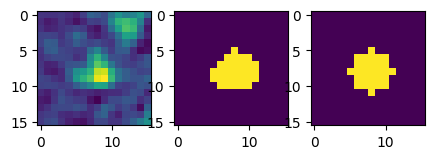

147.0 4.5 0.9166666666666666


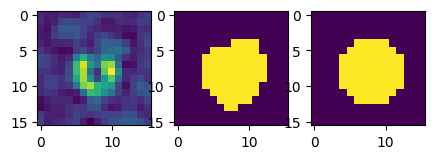

148.0 3.7 0.7288135593220338


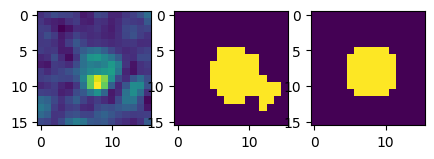

157.0 4.5 0.7625


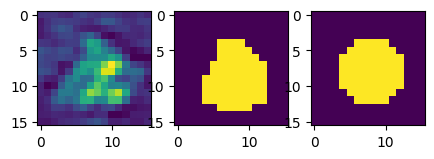

169.0 5.1000000000000005 0.7171717171717171


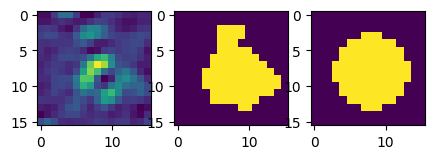

170.0 3.7 0.8627450980392157


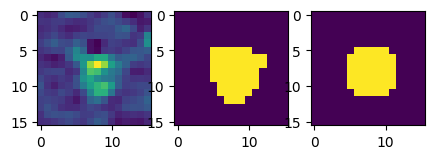

173.0 4.5 0.717948717948718


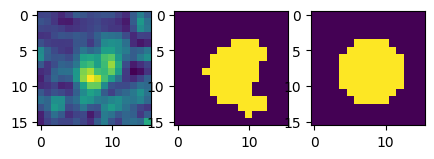

185.0 3.2 0.7368421052631579


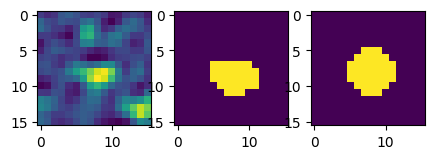

197.0 3.2 0.7368421052631579


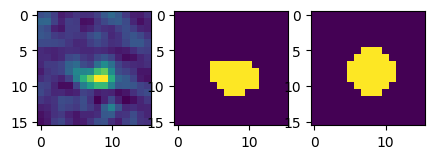

200.0 4.300000000000001 0.7164179104477612


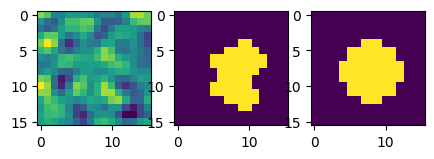

239.0 4.5 0.8571428571428571


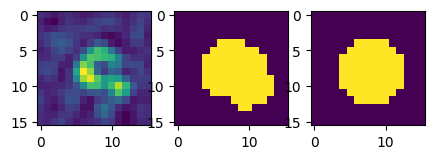

242.0 3.2 0.7142857142857143


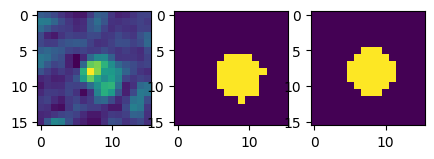

273.0 4.0 0.7192982456140351


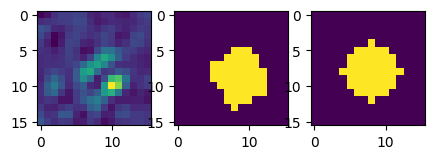

285.0 3.7 0.7692307692307693


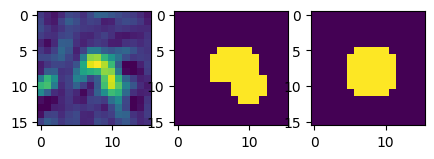

290.0 5.4 0.7545454545454545


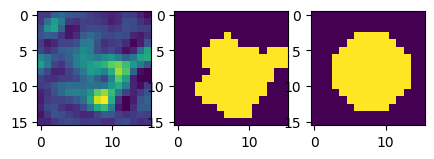

305.0 3.7 0.9333333333333333


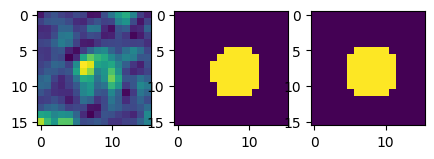

326.0 4.5 0.759493670886076


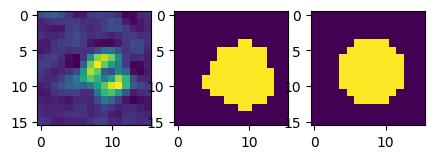

336.0 5.7 0.7297297297297297


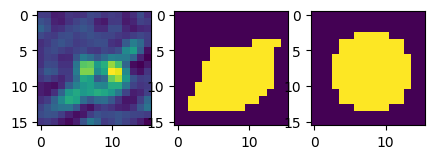

350.0 5.0 0.7727272727272727


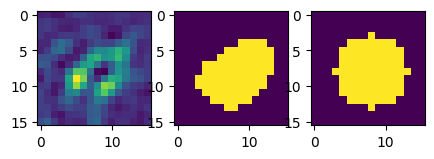

354.0 3.2 0.868421052631579


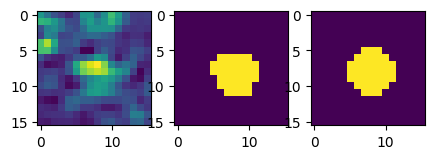

365.0 3.7 0.72


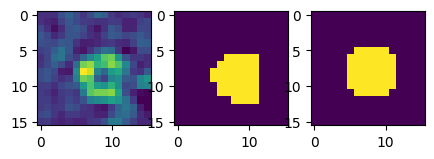

368.0 4.0 0.8269230769230769


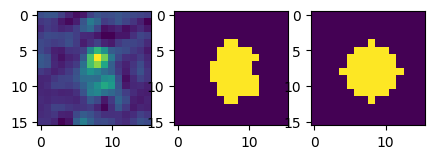

371.0 4.2 0.7352941176470589


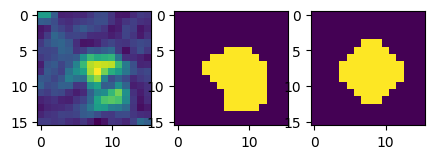

400.0 5.4 0.7428571428571429


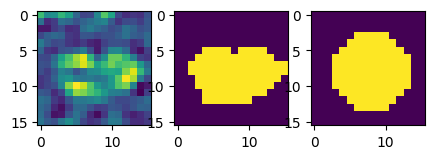

407.0 3.7 0.8695652173913043


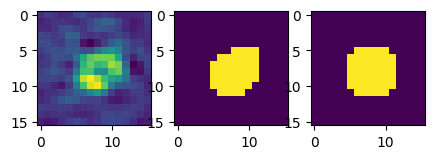

415.0 4.5 0.8148148148148148


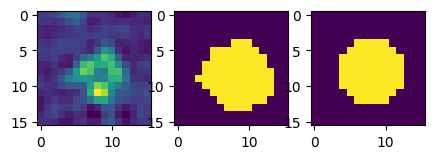

417.0 4.0 0.7272727272727273


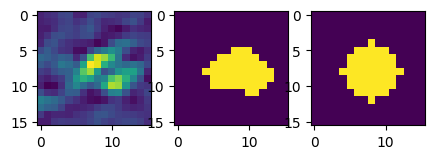

427.0 4.5 0.7894736842105263


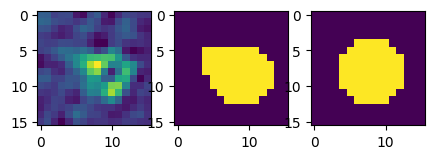

468.0 4.2 0.765625


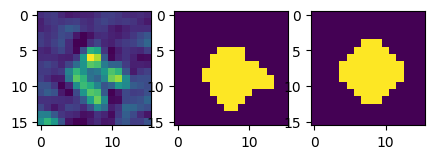

482.0 3.2 0.868421052631579


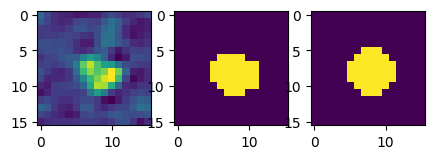

485.0 3.7 0.7708333333333334


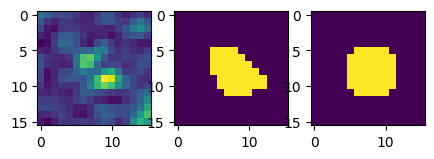

528.0 3.2 0.8108108108108109


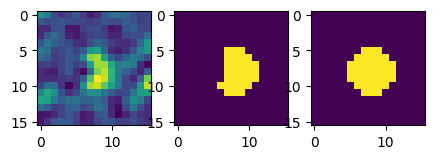

547.0 4.2 0.7796610169491526


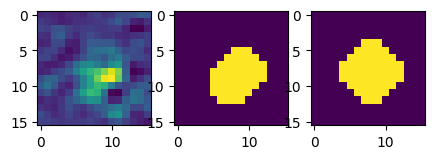

581.0 3.2 0.8095238095238095


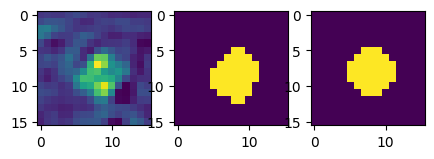

594.0 4.5 0.821917808219178


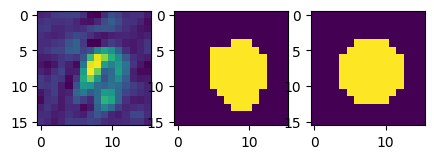

602.0 3.2 0.7142857142857143


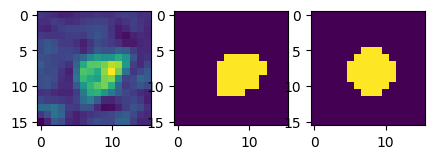

612.0 4.300000000000001 0.8


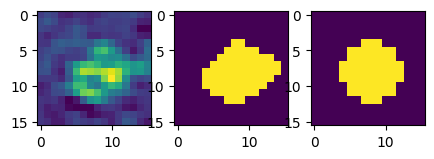

621.0 3.7 0.72


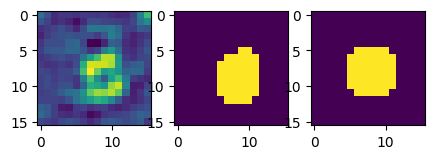

629.0 4.300000000000001 0.9032258064516129


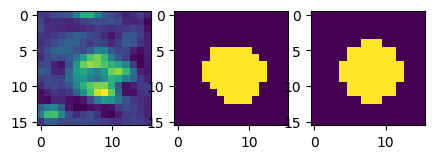

641.0 2.9000000000000004 0.7741935483870968


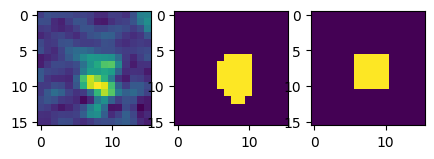

650.0 4.2 0.7575757575757576


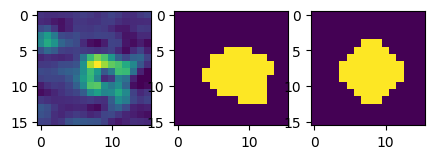

662.0 4.300000000000001 0.7941176470588235


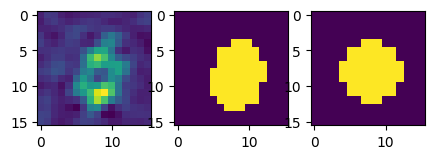

671.0 3.2 0.8421052631578947


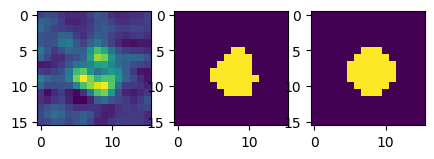

676.0 4.2 0.734375


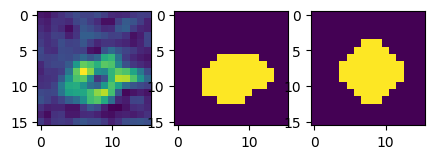

684.0 4.0 0.7307692307692307


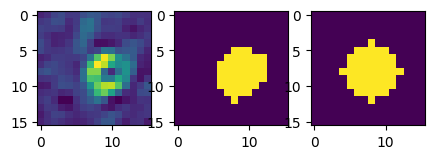

692.0 2.9000000000000004 0.7419354838709677


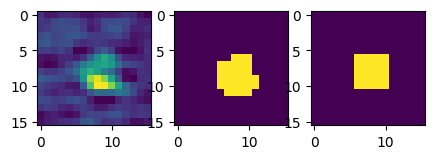

694.0 5.0 0.7272727272727273


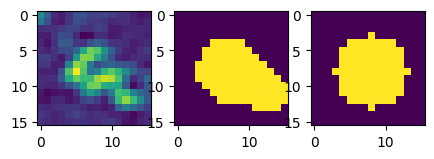

723.0 4.300000000000001 0.7384615384615385


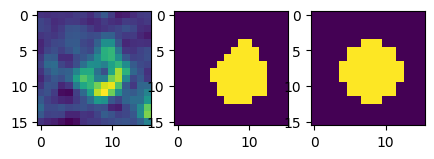

727.0 3.2 0.8


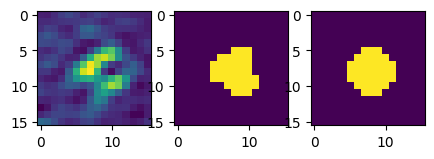

732.0 3.2 0.925


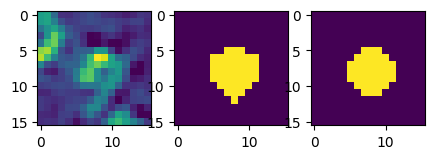

739.0 3.7 0.7843137254901961


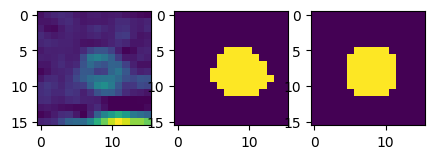

In [11]:
rings = pd.DataFrame()
opt_threshold = 170
for i in range(image.shape[0]):
    prop, label_mask_clean = idr.seg_cells(image[i], opt_threshold, 1.2, 25, 100, False)
    features = pd.DataFrame()
    for j in range(len(prop)): 
        y_center, x_center = prop[j].centroid # note that image coordinates are often given as (y, x) rather than (x, y)
#         plt.text(x_center, y_center, str(j), fontweight = 'bold', color = 'white',size = 5)

        features = features.append([{'label':prop[j].label,'x': prop[j].centroid[0],
                                     'y': prop[j].centroid[1],'length': prop[j].major_axis_length,'frame': i}])
    results = idr.ring_fitting(image[i], label_mask_clean, features, 8, 0.71, True)
    if "intensity" in results:
        rings = rings.append(results[results.intensity>0])
rings['final_intensity'] = rings['intensity'] - rings['background']

In [12]:
number_of_rings = len(rings)/image.shape[0]
number_of_rings

61.333333333333336

# Generate plots

In [13]:
gel_number = pd.read_csv(PATH + 'csv_data/number_with_gel.csv',index_col = 0)

In [14]:
rings_number = pd.read_csv(PATH + 'csv_data/number_no_gel.csv',index_col = 0)

In [15]:
rings_number=rings_number.append(gel_number)

In [16]:
rings_number = rings_number.rename({'w/o compression': 'No Compression','w/ compression':'After Compression'}, axis=1)

In [17]:
ttest_ind(rings_number['No Compression'].dropna(),rings_number['After Compression'].dropna())

Ttest_indResult(statistic=8.785835282367767, pvalue=4.870204349260261e-10)

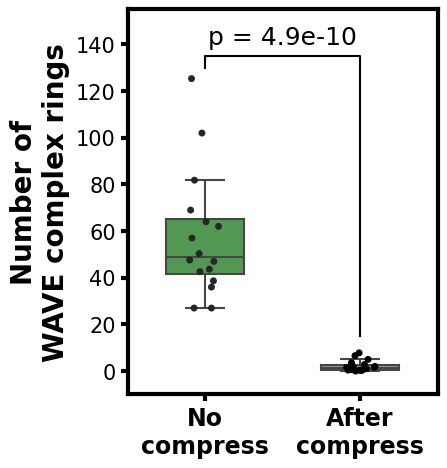

In [18]:
_,ax = plt.subplots(figsize = (4,5))
pal = ['#48a446','#999999']
ax = sns.boxplot(rings_number,width = 0.5, palette=pal,showfliers = False)
ax = sns.stripplot(rings_number, color= 'black')
plt.ylabel("Number of\nWAVE complex rings",size = 20,fontweight = 'bold')
y, h, col = 130, 5, 'k'
plt.plot([0, 0, 1,1], [y, y+h, y+h, y-115], lw=1.5, c=col)
plt.text(0.5, y+h+3, 'p = 4.9e-10', ha='center', va='bottom', color=col,size = 18)
plt.xlim(-0.5,1.5)
plt.ylim(-10,155)
plt.xticks(ticks = [0,1],labels=['No\ncompress','After\ncompress'],fontsize = 17,fontweight = 'bold')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

# increase tick width
ax.tick_params(width=3,size = 5)
plt.yticks(size = 15)
plt.savefig(PATH + 'Fig5H_Gel_compression.png',bbox_inches = 'tight',dpi = 300)

###### 